In [6]:
# Import PyTorch package
import numpy as np
import torch
import torchvision

In [7]:
# Import Dataset
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



torch.Size([1, 28, 28]) 7


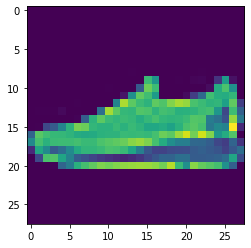

In [9]:
# Test Downloaded Dataset
image, label = trainingdata[1893]
print(image.shape, label)

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image.squeeze().numpy())
plt.show()

In [10]:
# Create data loader for training and testing
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)

print(len(trainDataLoader))
print(len(testDataLoader))

938
157


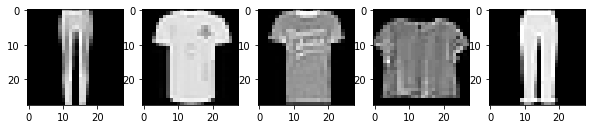

In [11]:
# Test Dataloader
images, labels = iter(trainDataLoader).next()

plt.figure(figsize=(10,4))
for index in np.arange(0,5):
  plt.subplot(1,5,index+1)
  plt.imshow(images[index].squeeze().numpy(),cmap=plt.cm.gray)

In [12]:
# Create Network Structure and initialize the parameter
from torch import nn

net_3_layers_perceptron = nn.Sequential(nn.Flatten(),
                    nn.Linear(28 * 28, 256),
                    nn.ReLU(),
                    nn.Linear(256, 128),
                    nn.ReLU(),
                    nn.Linear(128, 64),
                    nn.ReLU(),
                    nn.Linear(64, 10)).cuda()

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
      
net_3_layers_perceptron.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Linear(in_features=128, out_features=64, bias=True)
  (6): ReLU()
  (7): Linear(in_features=64, out_features=10, bias=True)
)

In [13]:
# Define the learning rate, epoch nums, optimizer, loss function...
lr = 0.02
epoch_nums = 50
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net_3_layers_perceptron.parameters(), lr)

In [14]:
# Begin training and testing
train_loss_history = []
test_loss_history = []
test_accuracy_history = []

for epoch in range(epoch_nums):
  train_loss = 0.0
  test_loss = 0.0
  test_accuracy = 0.0
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad()
    predicted_output = net_3_layers_perceptron(images)
    fit = Loss(predicted_output,labels)
    fit.backward()
    optimizer.step()
    train_loss += fit.item()
  
  correct_predicted_label_num = 0
  total_num_of_labels = len(testdata)
  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      predicted_output = net_3_layers_perceptron(images)
      fit = Loss(predicted_output,labels)
      test_loss += fit.item()
      
      # Calculate testing accuracy
      predicted_labels = torch.max(predicted_output, 1).indices
      correct_predicted_label_num += torch.eq(predicted_labels, labels).sum()


  test_accuracy = correct_predicted_label_num / total_num_of_labels
  train_loss = train_loss/len(trainDataLoader)
  test_loss = test_loss/len(testDataLoader)
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  test_accuracy_history.append(test_accuracy)
  print('Epoch %s, Train loss %s, Test loss %s'%(epoch, train_loss, test_loss))

Epoch 0, Train loss 2.303288939410944, Test loss 2.3026329453583734
Epoch 1, Train loss 2.3026656313999885, Test loss 2.3025010634379783
Epoch 2, Train loss 2.302520084736952, Test loss 2.3023078153087835
Epoch 3, Train loss 2.3020962522482313, Test loss 2.3013176371337503
Epoch 4, Train loss 2.2838296633539423, Test loss 2.1378464182471015
Epoch 5, Train loss 1.3927732301292135, Test loss 1.239315010939434
Epoch 6, Train loss 1.0284173071130251, Test loss 0.957804045100121
Epoch 7, Train loss 0.937849393912724, Test loss 0.9602925390194935
Epoch 8, Train loss 0.8683912374063342, Test loss 1.081169197513799
Epoch 9, Train loss 0.7525679993985305, Test loss 0.7556559291614848
Epoch 10, Train loss 0.6679288638171865, Test loss 0.6756025622984406
Epoch 11, Train loss 0.6047675323003391, Test loss 0.6313826830903436
Epoch 12, Train loss 0.5482314621239329, Test loss 0.5598531329328087
Epoch 13, Train loss 0.5056541453260602, Test loss 0.5387791215803972
Epoch 14, Train loss 0.4740880811169

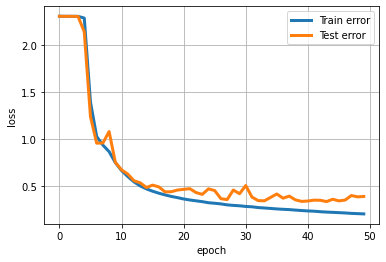

In [16]:
# Plotting tarining and testingloss
plt.plot(range(epoch_nums),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(epoch_nums),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

In [32]:
for i in range(epoch_nums):
  item = test_accuracy_history[i].cpu().numpy()
  test_accuracy_history[i] = item

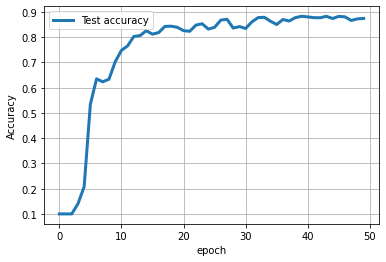

In [34]:
# Plotting testing accuracy
plt.plot(range(epoch_nums),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

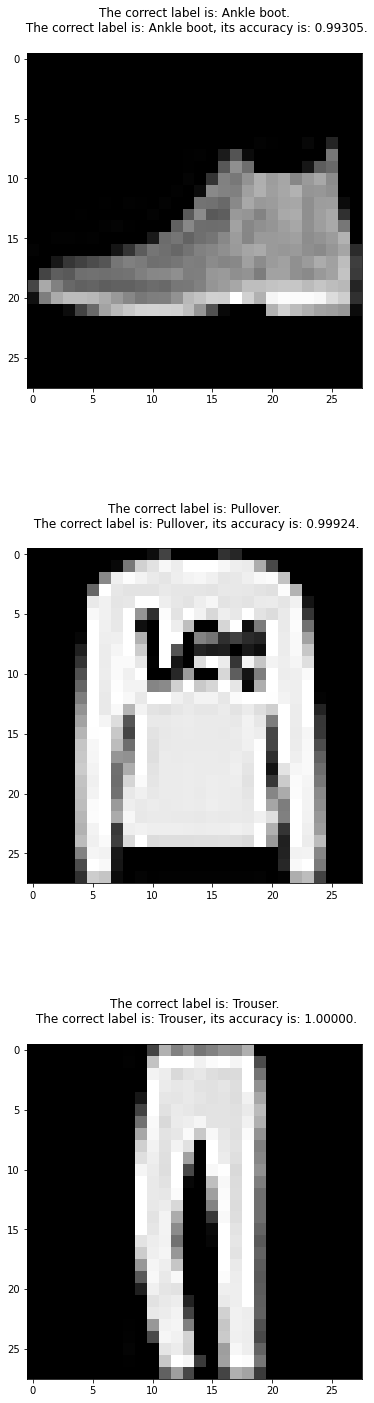

In [51]:
# Select random 3 images from test dataset and get the predicted labels using trained model
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
random_3_dataLoader = torch.utils.data.DataLoader(testdata,batch_size=3,shuffle=False)

random_3_images, random_3_labels = iter(random_3_dataLoader).next()
predicted_output = net_3_layers_perceptron(random_3_images.cuda())
predicted_labels = torch.max(predicted_output, 1)

# Print the prediction probabilities using softmax
softmax_layer = nn.Softmax(dim=1)
predicted_prob = softmax_layer(predicted_output)

# Plot selected images and its label, predicted label and prediction probability
plt.subplots_adjust(top=5)
for index in range(3):
  plt.subplot(3, 1, index+1)
  plt.imshow(random_3_images[index].cpu().squeeze().numpy(),cmap=plt.cm.gray)
  predicted_label = predicted_labels.indices[index]
  plt.title('The correct label is: %s.\n The correct label is: %s, its accuracy is: %.5lf.\n' % (class_names[random_3_labels[index]], class_names[predicted_label], predicted_prob[index][predicted_label]))